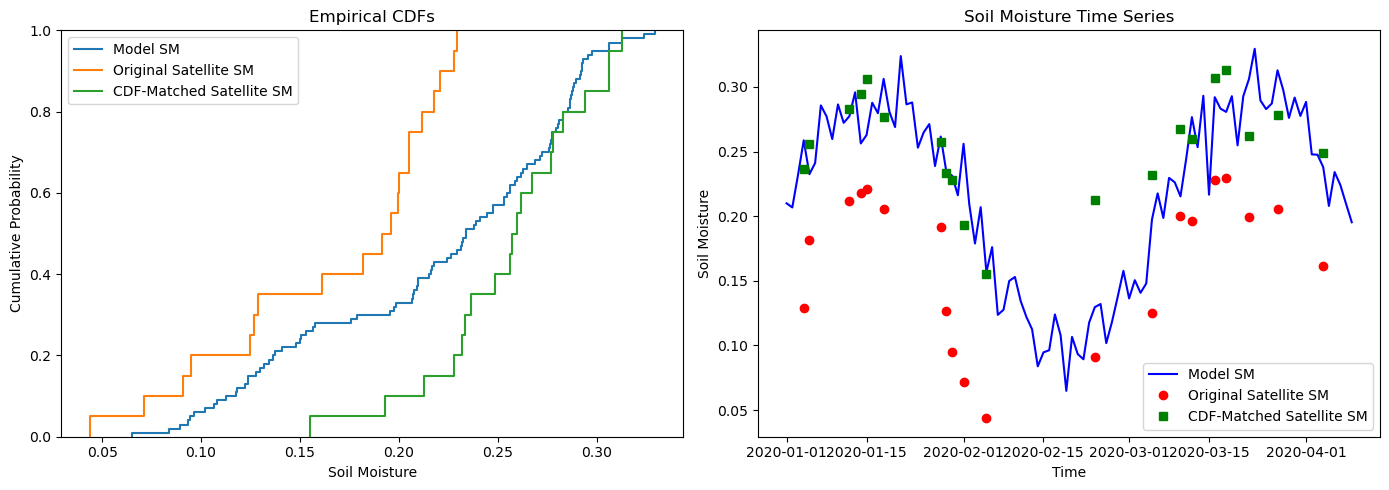

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate time axis
time = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generate model soil moisture (continuous, biased)
model_sm = 0.2 + 0.1 * np.sin(np.linspace(0, 3 * np.pi, 100)) + np.random.normal(0, 0.02, 100)

# Generate sparse satellite observations (e.g., SMAP), only 20 samples
sparse_indices = sorted(random.sample(range(100), 20))
sat_sm_orig = 0.15 + 0.08 * np.sin(np.linspace(0, 3 * np.pi, 20)) + np.random.normal(0, 0.015, 20)

# Interpolate satellite SM to full time for plotting, but keep only sparse values
sat_sm_full = np.full_like(model_sm, np.nan)
sat_sm_full[sparse_indices] = sat_sm_orig

# Define CDF matching function
def cdf_match(source, target, values_to_match):
    sorted_source = np.sort(source)
    sorted_target = np.sort(target)
    quantiles = np.searchsorted(sorted_source, values_to_match, side='right') / len(sorted_source)
    quantiles = np.clip(quantiles, 0, 1)
    matched_values = np.quantile(sorted_target, quantiles)
    return matched_values

# Apply CDF matching to sparse satellite values
matched_sat_sm = cdf_match(sat_sm_orig, model_sm[sparse_indices], sat_sm_orig)

# Store in full array
sat_sm_cdfmatched = np.full_like(model_sm, np.nan)
sat_sm_cdfmatched[sparse_indices] = matched_sat_sm

# Plot CDFs
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.ecdfplot(model_sm, label='Model SM')
sns.ecdfplot(sat_sm_orig, label='Original Satellite SM')
sns.ecdfplot(matched_sat_sm, label='CDF-Matched Satellite SM')
plt.title('Empirical CDFs')
plt.xlabel('Soil Moisture')
plt.ylabel('Cumulative Probability')
plt.legend()

# Plot time series
plt.subplot(1, 2, 2)
plt.plot(time, model_sm, label='Model SM', color='blue')
plt.plot(time, sat_sm_full, 'o', label='Original Satellite SM', color='red')
plt.plot(time, sat_sm_cdfmatched, 's', label='CDF-Matched Satellite SM', color='green')
plt.title('Soil Moisture Time Series')
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.legend()
plt.tight_layout()
plt.show()